In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


/opt/homebrew/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fixedRateBondDefinition={}
fixedRateBondDefinition["issueDate"]="2015-03-15"
fixedRateBondDefinition["maturityDate"]="2026-06-04"
fixedRateBondDefinition["frequency"]="Semiannual"
fixedRateBondDefinition["coupon"]=0.085
fixedRateBondDefinition["calendar"]="Turkey"
fixedRateBondDefinition["currency"]="TRY"
fixedRateBondDefinition["dateGeneration"]="Backward"
fixedRateBondDefinition["dayCounter"]="Actual360"
fixedRateBondDefinition["businessDayConvention"]="ModifiedFollowing"
fixedRateBondDefinition["maturityDateConvention"]="ModifiedFollowing"
fixedRateBondDefinition["redemption"]=100
fixedRateBondDefinition["endOfMonth"]=True
fixedRateBondDefinition

{'issueDate': '2015-03-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Semiannual',
 'coupon': 0.085,
 'calendar': 'Turkey',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True}

In [3]:
FRNDefinition={}
FRNDefinition["issueDate"]="2015-07-15"
FRNDefinition["maturityDate"]="2026-06-04"
FRNDefinition["frequency"]="Quarterly"
FRNDefinition["spread"]=0.0
FRNDefinition["calendar"]="Turkey"
FRNDefinition["currency"]="TRY"
FRNDefinition["dateGeneration"]="Backward"
FRNDefinition["dayCounter"]="Actual360"
FRNDefinition["businessDayConvention"]="ModifiedFollowing"
FRNDefinition["maturityDateConvention"]="ModifiedFollowing"
FRNDefinition["redemption"]=100
FRNDefinition["endOfMonth"]=True
FRNDefinition["fixingDate"]=["2020-12-02"]
FRNDefinition["fixingRate"]=[0.0012428641149285805]
FRNDefinition

{'issueDate': '2015-07-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Quarterly',
 'spread': 0.0,
 'calendar': 'Turkey',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True,
 'fixingDate': ['2020-12-02'],
 'fixingRate': [0.0012428641149285805]}

In [4]:
fixedleg={}
fixedleg["payOrReceive"]="Receive"
fixedleg["coupon"]= 0.085
fixedleg["frequency"]="Semiannual"
fixedleg["calendar"]="Turkey"
fixedleg["dateGeneration"]="Backward"
fixedleg["dayCounter"]="Actual360"
fixedleg["businessDayConvention"]="ModifiedFollowing"
fixedleg["maturityDateConvention"]="ModifiedFollowing"
fixedleg["endOfMonth"]=True
fixedleg

{'payOrReceive': 'Receive',
 'coupon': 0.085,
 'frequency': 'Semiannual',
 'calendar': 'Turkey',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'endOfMonth': True}

In [5]:
floatingleg={}
floatingleg["frequency"]="Quarterly"
floatingleg["spread"]=0.0
floatingleg["calendar"]="Turkey"
floatingleg["dateGeneration"]="Backward"
floatingleg["dayCounter"]="Actual360"
floatingleg["businessDayConvention"]="ModifiedFollowing"
floatingleg["maturityDateConvention"]="ModifiedFollowing"
floatingleg["endOfMonth"]=True
floatingleg["fixingDate"]=["2020-12-02"]
floatingleg["fixingRate"]=[0.0012428641149285805]
floatingleg

{'frequency': 'Quarterly',
 'spread': 0.0,
 'calendar': 'Turkey',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'endOfMonth': True,
 'fixingDate': ['2020-12-02'],
 'fixingRate': [0.0012428641149285805]}

In [6]:
instruments={}
depo={}
irs={}

depo["businessDayConvention"]="Following"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                # if it is null, default value is used

irs["businessDayConvention"]="Following"      # if it is null, default value is used 
irs["dayCounter"]="Actual360"                 # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'Following', 'dayCounter': 'Actual360'},
 'IRS': {'businessDayConvention': 'Following',
  'dayCounter': 'Actual360',
  'frequency': 'Semiannual'}}

In [7]:
# Fix parameters for building yield curve
yieldcurveconfig={
      "name": "TRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }


In [8]:

yieldcurveconfig['applyShock']={
  "method": "parallel",
  "shockValues" : [
    {
      "tenor" : "all",
      "shockValue" : 150.0
    }
  ]
}
yieldcurveconfig

{'name': 'TRYZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360'},
  'IRS': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360',
   'frequency': 'Semiannual'}},
 'applyShock': {'method': 'parallel',
  'shockValues': [{'tenor': 'all', 'shockValue': 150.0}]}}

In [9]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "total_present_value",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "TRY",
  "tasks": [
            {
      "trade_id": "FLOAT1000",
      "calculation_type": "floating_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Buy",
      "discountCurve": "TRYZC",
      "floatingBondDefinition": FRNDefinition
    },{
      "trade_id": "FRB1000",
      "calculation_type": "fixed_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Sell",
      "discountCurve": "TRYZC",
      "fixedRateBondDefinition": fixedRateBondDefinition
    },
      {
      "trade_id": "IRS1000",
      "calculation_type": "interest_rates_swap",
      "discountCurve": "TRYZC",
      "floatingLegForecastCurve": "TRYZC",
      "settlementDate": "2021-02-01",
      "maturityDate": "2026-06-04",
      "startDate": "2021-02-01",
      "notional": 1000000,
      "currency": "TRY",
      "fixedLeg":fixedleg,
      "floatingLeg":floatingleg
    }
  ],
  "curves": [yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [10]:
try:
    res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(res["result"]):
      result=json.loads(res["result"])
    else:
      print(res["result"])
except RhoovaError as e:
    e.printPretty()

In [11]:
shock=[-250,-200,-150,-100,-50,0,50,100,150,200,250]

In [12]:
lst=[]
for s in shock:
    res_lst={}
    yieldcurveconfig["applyShock"]["shockValues"][0]["shockValue"]=s
    try:
        res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
        if(res["result"]):
            result=json.loads(res["result"])
        else:
            print(res["result"])
    except RhoovaError as e:
        e.printPretty()    
    res_lst[s]=result["total_present_value"]  
    lst.append(res_lst)


In [13]:
shck=[]
val=[]
for i in lst:
    shck.append(list(i.keys())[0])
    val.append(list(i.values())[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


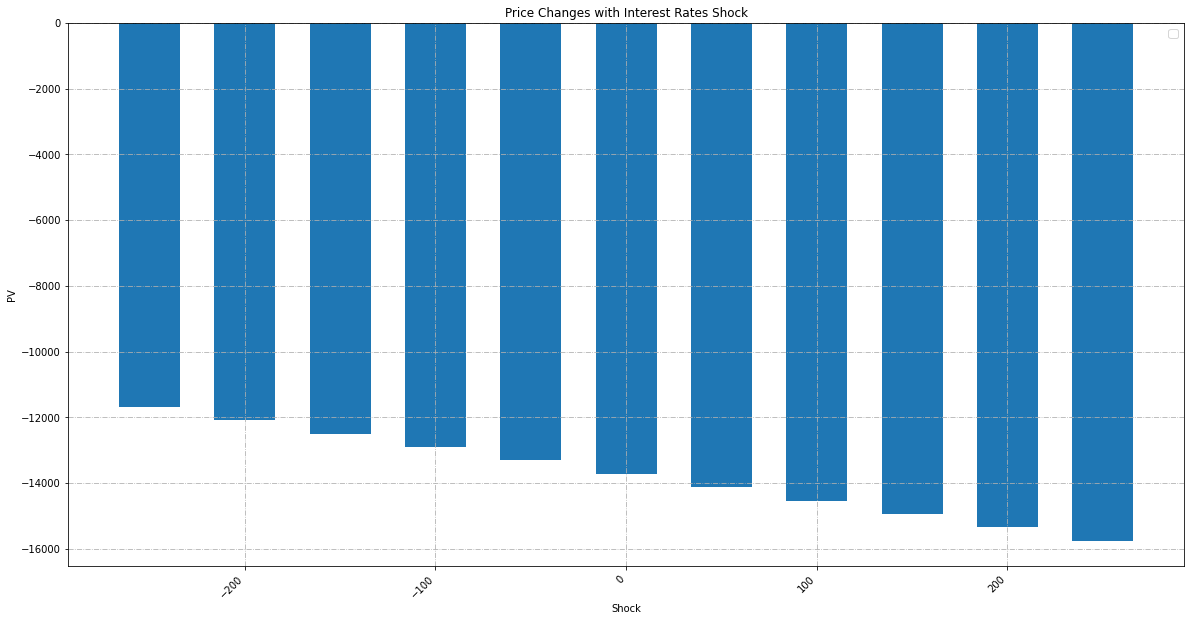

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

x=shck
y =val 

ax.bar(x,y,width=32)

leg = ax.legend(prop={'size': 12});
plt.grid(linestyle='dashdot')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel='Shock', ylabel='PV',
       title='Price Changes with Interest Rates Shock')
plt.show()